<a href="https://colab.research.google.com/github/microprediction/nba/blob/main/basketball_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall numpy -y

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Successfully uninstalled numpy-1.19.5


In [ ]:
!pip install pycaret

In [10]:
URL = 'https://raw.githubusercontent.com/microprediction/nba/main/data/games.csv'
import pandas as pd
games = pd.read_csv(URL)


In [11]:
games.mean()

Unnamed: 0    4.916300e+04
SEASON_ID     2.286793e+04
TEAM_ID       1.610613e+09
GAME_ID       5.610461e+07
MIN           2.404747e+02
PTS           1.014087e+02
FGM           3.814337e+01
FGA           8.313457e+01
FG_PCT        4.594230e-01
FG3M          5.858930e+00
FG3A          1.667705e+01
FG3_PCT       3.378722e-01
FTM           1.926310e+01
FTA           2.553446e+01
FT_PCT        7.547573e-01
OREB          1.197411e+01
DREB          3.054792e+01
REB           4.252382e+01
AST           2.263167e+01
STL           7.935734e+00
BLK           5.003885e+00
TOV           1.467328e+01
PF            2.212192e+01
PLUS_MINUS    3.641636e-02
dtype: float64

In [12]:
for col,multi in zip(['FG_PCT','FG3_PCT','FT_PCT'],[83.1,16.6,25.5]):
  games[col.replace('_PCT','_SCALED')]=games[col]*multi


In [17]:
need = ['FG_SCALED', 'FG3_SCALED','FT_SCALED', 'OREB', 'DREB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PTS']
games = games[need]
len(games)

98327

In [18]:
test_data = games[-10000:]
train_data = games[:-10000]

In [15]:
from pycaret.regression import *

In [19]:
experiment = setup(data = train_data, target = 'PTS', session_id=99)

,Description,Value
0,session_id,99
1,Target,PTS
2,Original Data,"(88327, 11)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(61828, 10)"


In [20]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,5.6514,51.3527,7.1658,0.7286,0.0730,0.0567,0.596
gbr,Gradient Boosting Regressor,5.8964,55.7206,7.4643,0.7055,0.0759,0.0591,5.734
ridge,Ridge Regression,5.9021,55.9229,7.4778,0.7045,0.0805,0.0597,0.033
lar,Least Angle Regression,5.9021,55.9229,7.4778,0.7045,0.0805,0.0597,0.035
br,Bayesian Ridge,5.9021,55.9229,7.4778,0.7045,0.0805,0.0597,0.047
lr,Linear Regression,5.9021,55.9229,7.4778,0.7045,0.0805,0.0597,0.397
huber,Huber Regressor,5.8946,56.0125,7.4838,0.7040,0.0805,0.0595,0.805
en,Elastic Net,5.9379,56.5597,7.5203,0.7011,0.0813,0.0602,0.036
rf,Random Forest Regressor,5.9338,56.6333,7.5252,0.7007,0.0782,0.0603,26.421
lasso,Lasso Regression,5.9494,56.7943,7.5359,0.6999,0.0815,0.0604,0.037


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=99, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
xgboost = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.6865,51.5065,7.1768,0.7326,0.0754,0.0574
1,5.6269,50.6796,7.1190,0.7366,0.0829,0.0570
2,5.7086,52.8948,7.2729,0.7222,0.0706,0.0567
3,5.6418,51.8736,7.2023,0.7355,0.0789,0.0600
4,5.6315,50.8549,7.1313,0.7249,0.0694,0.0559
5,5.7039,52.7913,7.2658,0.7188,0.0708,0.0567
6,5.6223,51.4027,7.1696,0.7283,0.0696,0.0556
7,5.6794,51.3327,7.1647,0.7272,0.0698,0.0563
8,5.6058,49.7583,7.0540,0.7300,0.0691,0.0558
9,5.6069,50.4323,7.1016,0.7303,0.0732,0.0558


In [ ]:
!pip install shap

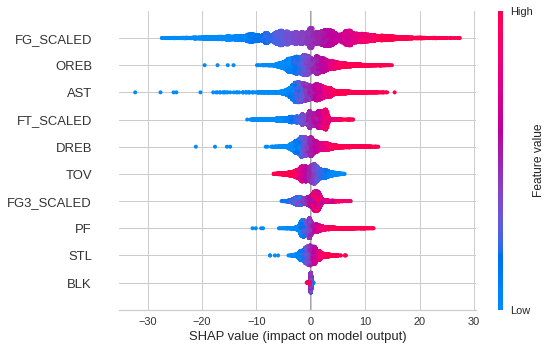

In [26]:
interpret_model(xgboost)